In [1]:
library(ggplot2)
library(reshape2)
library(RColorBrewer)
suppressMessages(library(dplyr))
library(stringr)
suppressMessages(library(tidyr))
theme_set(theme_bw())
library(scales)
options(repr.plot.width=7, repr.plot.height=4)
isotypes = c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'iMet', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')

paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='8:14', 'X9.23'='9:23', 'X10.25'='10:25', 'X10.45'='10:45', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='15:48','X18.55'='18:55', 'X19.56'='19:56', 'X22.46'='22:46', 'X26.44'='26:44', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='54:58')
paired_identities = c('GC', 'AU', 'UA', 'CG', 'GU', 'UG', 'PairDeletion', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'Wobble', 'Paired', 'Bulge', 'Mismatched')
paired_colors = c('GC'='gray20', 'AU'='gray20', 'UA'='gray20', 'CG'='gray20', 'GU'='gray20', 'UG'='gray20', 'PairDeletion'='gray20', 'PurinePyrimidine'='gray40', 'PyrimidinePurine'='gray40', 'StrongPair'='gray40', 'WeakPair'='gray40', 'Wobble'='gray40', 'Paired'='gray40', 'Bulge'='gray40', 'Mismatched'='gray40')

single_positions = c('X8'='8', 'X9'='9', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')
single_identities = c('A', 'C', 'G', 'U', 'Deletion', 'Purine', 'Pyrimidine', 'Weak', 'Strong', 'Amino', 'Keto', 'B', 'D', 'H', 'V')
single_colors = c('A'='gray20', 'C'='gray20', 'G'='gray20', 'U'='gray20', 'Deletion'='gray20', 'Purine'='gray40', 'Pyrimidine'='gray40', 'Weak'='gray40', 'Strong'='gray40', 'Amino'='gray40', 'Keto'='gray40', 'B'='gray40', 'D'='gray40', 'H'='gray40', 'V'='gray40')

In [2]:
identities = read.delim('identities.tsv', sep='\t')
identities$quality = as.logical(identities$quality)
identities$restrict = as.logical(identities$restrict)
identities = identities %>% mutate(quality=quality & (!restrict | isotype == "iMet"))

In [3]:
load('best-freqs.RData')
load('clade-isotype-specific.RData')
load('isotype-specific.RData')
load('consensus-IDEs.RData')
load('clade-isotype-specific-freqs.RData')

## Quality set stats

In [4]:
df = identities %>% group_by(isotype, clade, quality) %>% 
  summarize(count=n()) %>%
  ungroup()
df = rbind(df, cbind(expand.grid(isotype=unique(df$isotype), clade=unique(df$clade), quality=unique(df$quality)), count=0))
df %>% group_by(isotype, clade, quality) %>% 
  summarize(count=sum(count)) %>%
  group_by(isotype, clade) %>%
  arrange(rev(quality)) %>%
  summarize(count=paste0(count, collapse='/')) %>%
  spread(isotype, count)

,clade,Ala,Arg,Asn,Asp,Cys,Gln,Glu,Gly,His,Ile,iMet,Leu,Lys,Met,Phe,Pro,Ser,Thr,Trp,Tyr,Val
1,Fungi,752/26,806/106,404/44,517/29,194/36,425/24,547/5,827/9,209/21,563/8,180/2,834/8,723/9,209/3,404/46,505/18,846/16,686/93,215/4,216/11,768/78
2,Insecta,68/0,86/0,34/0,35/0,22/0,38/0,60/0,68/0,20/0,41/0,20/1,79/0,71/0,21/0,28/0,54/0,67/0,69/0,27/0,32/0,58/0
3,Mammalia,1158/19540,1013/1487,523/16,411/7238,952/150,519/4,765/6700,970/650,298/10,572/73,328/0,928/14,1108/1555,306/18,385/39,643/2,960/20,728/68,265/314,402/8,802/24
4,Nematoda,257/36,279/47,130/22,166/24,90/16,172/26,293/42,308/186,109/20,161/30,60/9,273/165,291/83,74/12,102/20,273/41,230/62,226/100,87/23,111/19,212/33
5,Spermatophyta,120/1,108/1,63/1,77/1,44/2,52/0,89/0,123/3,35/4,79/11,32/0,129/4,95/2,39/2,46/3,126/0,145/11,74/27,40/5,86/6,105/1
6,Streptophyta,385/13,329/9,195/19,224/2,116/7,178/24,283/2,378/47,100/10,258/79,101/0,387/9,286/187,131/19,143/3,281/1,356/39,224/106,112/29,129/26,293/0
7,Vertebrata,810/3146,1088/351,379/774,476/237,451/71,452/235,551/338,607/1008,366/13,487/304,443/12,572/1033,700/1530,336/209,401/72,522/347,629/1100,786/10513,274/36,478/18,509/522


## Consensus elements by cutoff table

In [5]:
resolve_code = function(codes) {
  codes = unique(codes)
  x = c(A = all(codes %in% 'A'),
        C = all(codes %in% 'C'),
        G = all(codes %in% 'G'),
        U = all(codes %in% 'U'),
        Deletion = all(codes %in% 'Deletion'),
        Purine = all(codes %in% c('A', 'G', 'Purine')),
        Pyrimidine = all(codes %in% c('C', 'U', 'Pyrimidine')),
        Weak = all(codes %in% c('A', 'U', 'Weak')),
        Strong = all(codes %in% c('G', 'C', 'Strong')),
        Amino = all(codes %in% c('A', 'C', 'Amino')),
        Keto = all(codes %in% c('G', 'U', 'Keto')),
        B = all(codes %in% c('C', 'G', 'U', 'B', 'Strong', 'Pyrimidine', 'Keto')),
        D = all(codes %in% c('A', 'G', 'U', 'D', 'Purine', 'Weak', 'Keto')),
        H = all(codes %in% c('A', 'C', 'U', 'H', 'Amino', 'Weak', 'Pyrimidine')),
        V = all(codes %in% c('A', 'C', 'G', 'V', 'Amino', 'Purine', 'Strong')),
        GC = all(codes %in% 'GC'),
        AU = all(codes %in% 'AU'),
        UA = all(codes %in% 'UA'),
        CG = all(codes %in% 'CG'),
        GU = all(codes %in% 'GU'),
        UG = all(codes %in% 'UG'),
        PairDeletion = all(codes %in% 'PairDeletion'), 
        PurinePyrimidine = all(codes %in% c('AU', 'GC', 'PurinePyrimidine')),
        PyrimidinePurine = all(codes %in% c('UA', 'CG', 'PyrimidinePurine')),
        StrongPair = all(codes %in% c('GC', 'CG', 'StrongPair')),
        WeakPair = all(codes %in% c('AU', 'UA', 'WeakPair')),
        Wobble = all(codes %in% c('GU', 'UG', 'Wobble')),
        Paired = all(codes %in% c('AU', 'UA', 'CG', 'GC', 'GU', 'UG', 'Paired', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'Wobble')),
        Bulge = all(codes %in% 'Bulge'),
        Mismatched = all(codes %in% c('AA', 'GG', 'CC', 'UU', 'AG', 'AC', 'CA', 'CU', 'GA', 'UC', 'Mismatched')))
  return(names(x[which(x)]))
}

get_consensus_IDE = function(position, codes) {
  position = unique(position)
  best_codes = resolve_code(codes) # returns a vector of all possible combinations of bases. Note that this is not limited to the basic combinations given by the codes variable.
  if (length(position) != 1) stop("Multiple positions passed to function")
  if (length(codes) != 147) return("N/A") # make sure that each isotype/clade is represented
  if (length(best_codes) == 0) return("N/A")
  codes = list(A = "A", C = "C", G = "G", U = "U", Deletion = c("-", "."), Purine = c("A", "G"), Pyrimidine = c("C", "U"), Weak = c("A", "U"), Strong = c("G", "C"), Amino = c("A", "C"), Keto = c("G", "U"), B = c("C", "G", "U"), D = c("A", "G", "U"), H = c("A", "C", "U"), V = c("A", "C", "G"), D = c("A", "G", "U"), GC =  "G:C", AU =  "A:U", UA =  "U:A", CG =  "C:G", GU =  "G:U", UG =  "U:G", PairDeletion =  "-:-", PurinePyrimidine = c("A:U", "G:C"), PyrimidinePurine = c("U:A", "C:G"), StrongPair = c("G:C", "C:G"), WeakPair = c("A:U", "U:A"), Wobble = c("G:U", "U:G"), Paired = c("A:U", "U:A", "C:G", "G:C", "G:U", "U:G"), Bulge = c("A:-", "U:-", "C:-", "G:-", "-:A", "-:G", "-:C", "-:U"), Mismatched = c("A:A", "G:G", "C:C", "U:U", "A:G", "A:C", "C:A", "C:U", "G:A", "U:C")) 
  # for each possible code, check each species
  # this ensures that we consider other IDEs if the most specific one fails the species check. For example, if "Purine" fails, we also consider "V"
  species_check = sapply(best_codes, function(code) {
    codes_str = paste0("c('", paste0(codes[[code]], collapse="', '"), "')")
    df = identities %>% select_('species', 'isotype', position) %>%
           group_by_('species', 'isotype') %>% 
           summarize_(match = paste0("sum(", position, " %in% ", codes_str, ")"),
                      miss = paste0("sum(!(", position, " %in% ", codes_str, "))")) %>%
           mutate(ubiquitous = match > miss)
    all(df$ubiquitous)
  })
  ide = names(species_check[species_check])[1]
  return(ifelse(is.na(ide), "N/A", ide))
}

cutoff_freqs = data.frame()
for (cutoff in c(0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0)) {
  df = clade_iso_ac_freqs %>%
    group_by(positions, variable) %>% # remove duplicates
    summarize(count=sum(value), freq=sum(value)/sum(total)) %>%
    filter(freq >= cutoff) %>%
    mutate(cutoff=as.character(cutoff)) %>%
    group_by(positions) %>%
    filter(row_number(freq) == 1)
  if (nrow(cutoff_freqs) == 0) cutoff_freqs = df
  else cutoff_freqs = rbind(cutoff_freqs, df)
}

In [6]:
cutoff_freqs %>% select(positions, cutoff, variable) %>% 
  filter(positions %in% c(names(single_positions), names(paired_positions))) %>%
  spread(cutoff, variable)

,positions,0.5,0.6,0.7,0.8,0.9,0.95,0.99
1,X10.25,GC,GC,GC,Paired,Paired,Paired,Paired
2,X10.45,Mismatched,Mismatched,Mismatched,Mismatched,NA,NA,NA
3,X11.24,CG,CG,PyrimidinePurine,PyrimidinePurine,PyrimidinePurine,PyrimidinePurine,Paired
4,X12.23,StrongPair,PyrimidinePurine,Paired,Paired,Paired,Paired,NA
5,X13.22,PyrimidinePurine,Paired,NA,NA,NA,NA,NA
6,X14,A,A,A,A,A,A,A
7,X15,G,G,G,G,Purine,Purine,Purine
8,X15.48,GC,GC,GC,PurinePyrimidine,PurinePyrimidine,Paired,NA
9,X16,U,U,U,Weak,Pyrimidine,B,NA
10,X17,Deletion,Deletion,NA,NA,NA,NA,NA


## Clade-isotype-specific heatmap

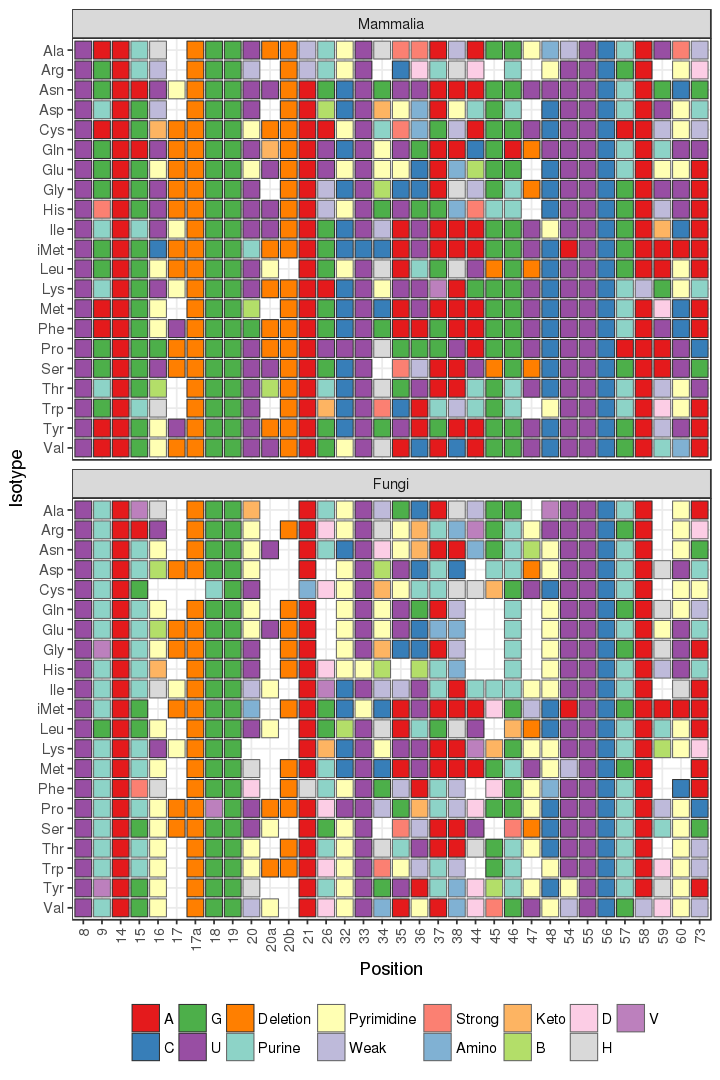

In [7]:
options(repr.plot.width=6, repr.plot.height=9)
clade_isotype_specific %>%
  filter(clade %in% c("Mammalia", "Fungi")) %>%
  filter(!str_detect(positions, '\\.')) %>%
  mutate(positions=factor(positions, names(single_positions))) %>%
  mutate(identity=factor(identity, single_identities)) %>%
  ungroup() %>%
  mutate(clade=factor(clade, levels=c("Mammalia", "Fungi"))) %>%
  ggplot() + geom_tile(aes(x=positions, y=isotype, fill=identity, color=identity), width=0.9, height=0.9, size=0.3) + 
    facet_wrap(~ clade, nrow=2) +
    scale_x_discrete(labels=single_positions) +
    scale_y_discrete(limits=rev(isotypes)) +
    scale_color_manual(values=single_colors) +
    scale_fill_manual(values=c(brewer.pal(5, "Set1"), brewer.pal(12, "Set3"))) +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position="bottom") +
    xlab('Position') + ylab('Isotype') +
    theme(legend.position="bottom") +
    guides(fill=guide_legend(title=NULL, nrow=2), color=guide_legend(title=NULL, nrow=2))

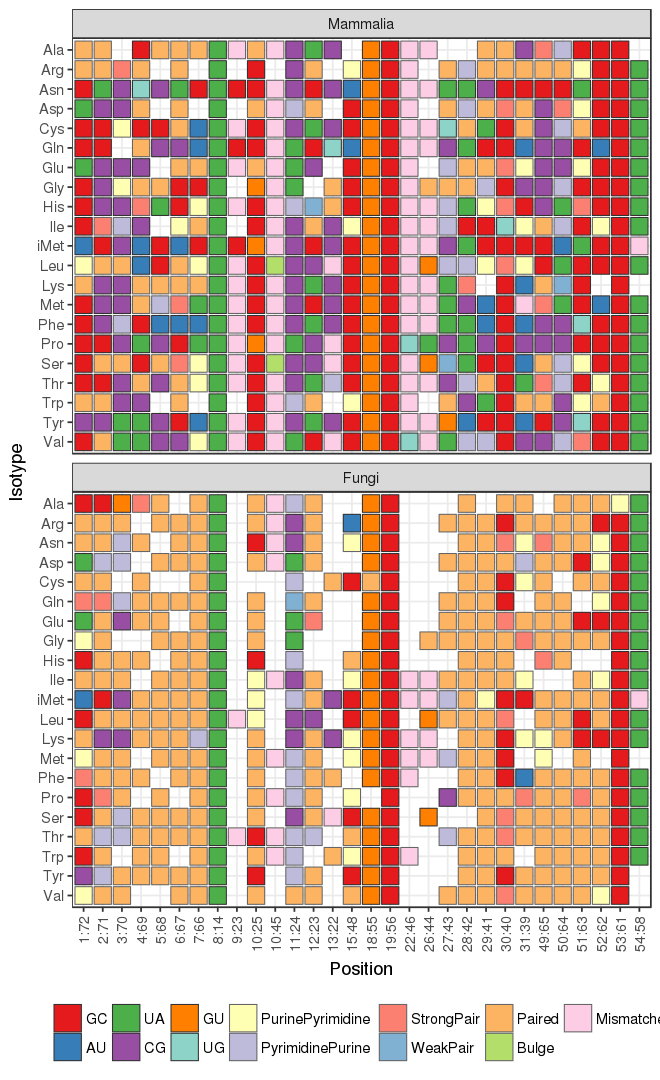

In [8]:
options(repr.plot.width=5.5, repr.plot.height=9)
clade_isotype_specific %>%
  filter(clade %in% c("Mammalia", "Fungi")) %>%
  filter(str_detect(positions, '\\.')) %>%
  mutate(positions=factor(positions, names(paired_positions))) %>%
  mutate(identity=factor(identity, paired_identities)) %>%
  ungroup() %>%
  mutate(clade=factor(clade, levels=c("Mammalia", "Fungi"))) %>%
  ggplot() + geom_tile(aes(x=positions, y=isotype, fill=identity, color=identity), width=0.9, height=0.9, size=0.3) + 
    facet_wrap(~ clade, nrow=2) +
    scale_x_discrete(labels=paired_positions) +
    scale_y_discrete(limits=rev(isotypes)) +
    scale_color_manual(values=paired_colors) +
    scale_fill_manual(values=c(brewer.pal(5, "Set1"), brewer.pal(12, "Set3"))) +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5), legend.position="bottom") +
    xlab('Position') + ylab('Isotype') +
    theme(legend.position="bottom") +
    guides(fill=guide_legend(title=NULL, nrow=2), color=guide_legend(title=NULL, nrow=2))

# tRNA features

## Stem & loop sizes

In [9]:
df = identities %>% 
  filter(quality) %>%
  rowwise() %>%
  mutate(Astem=sum(c(X1.72 != '-:-', X2.71 != '-:-', X3.70 != '-:-', X4.69 != '-:-', X5.68 != '-:-', X6.67 != '-:-', X7.66 != '-:-')),
         Dstem=sum(c(X10.25 != '-:-', X11.24 != '-:-', X12.23 != '-:-', ifelse(isotype %in% c("Leu", "Ser", "Tyr"), FALSE, X13.22 != '-:-'))),
         Cstem=sum(c(X27.43 != '-:-', X28.42 != '-:-', X29.41 != '-:-', X30.40 != '-:-', X31.39 != '-:-')),
         Varm=V.arm + sum(c(V11.V21 != '-:-', V12.V22 != '-:-', V13.V23 != '-:-', V14.V24 != '-:-', V15.V25 != '-:-', V16.V26 != '-:-', V17.V27 != '-:-')),
         TPCstem=sum(c(X49.65 != '-:-', X50.64 != '-:-', X51.63 != '-:-', X52.62 != '-:-', X53.61 != '-:-'))) %>%
  select(quality, isotype, Astem, Dstem, D.loop, Cstem, AC.loop, Varm, TPCstem, TPC.loop) %>%
  group_by(isotype) %>%
  summarize(Astem=mean(Astem), Dstem=mean(Dstem), Dloop=mean(D.loop), Cstem=mean(Cstem), Cloop=mean(AC.loop), TPCloop=mean(TPC.loop), TPCstem=mean(TPCstem), Varm=mean(Varm)) %>%
  melt(id.vars='isotype')

df = rbind(df, cbind(expand.grid(isotype=levels(df$isotype), variable=levels(df$variable)), value=0))

Warning message:
: Grouping rowwise data frame strips rowwise nature

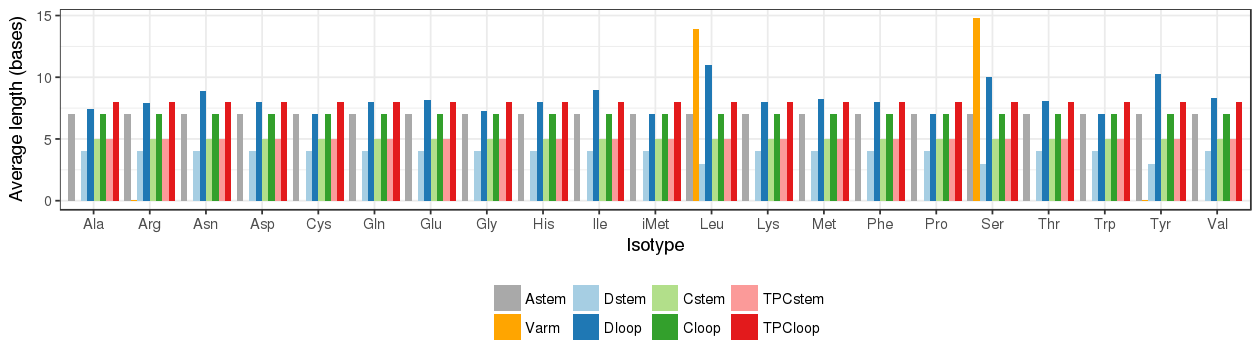

In [10]:
options(repr.plot.width=10.5, repr.plot.height=3)
df %>% mutate(variable=factor(variable, levels=c("Acceptor stem"="Astem", "Variable arm"="Varm", "D-stem"="Dstem", "D-loop"="Dloop", "Anticodon stem"="Cstem", "Anticodon loop"="Cloop", "TψC stem"="TPCstem", "TψC loop"="TPCloop"))) %>%
  ggplot() + geom_bar(aes(x=isotype, y=value, fill=variable), stat='identity', position='dodge') +
    scale_fill_manual(values=c("darkgray", "orange", brewer.pal(7, "Paired"))) + 
    theme(legend.position="bottom") +
    xlab("Isotype") + ylab("Average length (bases)") +
    guides(fill=guide_legend(title=NULL))

## D-loop insertions

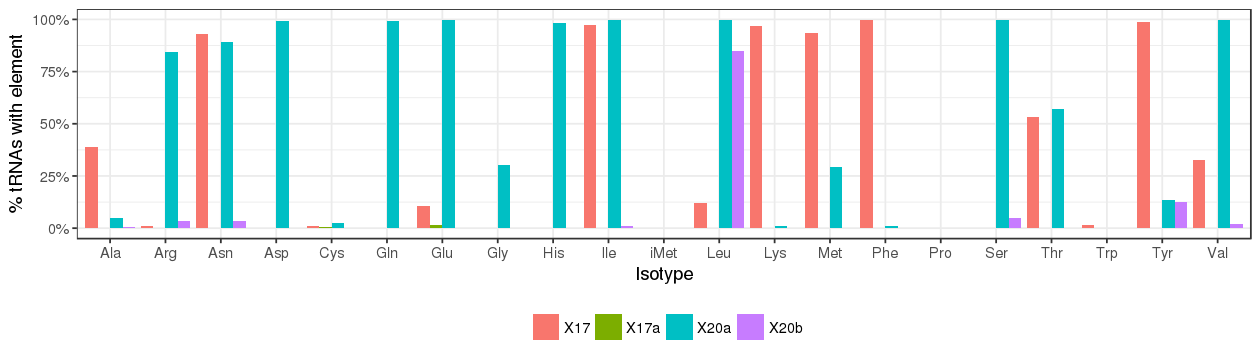

In [11]:
options(repr.plot.width=10.5, repr.plot.height=3)
identities %>% mutate(X17=X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  select(quality, isotype, X17, X17a, X20a, X20b) %>%
  filter(quality) %>%
  group_by(isotype) %>%
  summarize(X17=mean(X17), X17a=mean(X17a), X20a=mean(X20a), X20b=mean(X20b)) %>%
  melt(id.vars='isotype') %>%
  ggplot() + geom_bar(aes(x=isotype, y=value, fill=variable), stat='identity', position='dodge') +
    scale_y_continuous(labels=percent_format()) +
    theme(legend.position="bottom") +
    xlab("Isotype") + ylab("% tRNAs with element") +
    guides(fill=guide_legend(title=NULL))

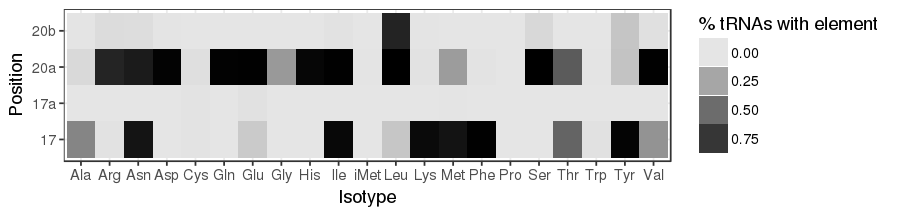

In [12]:
options(repr.plot.width=7.5, repr.plot.height=1.8)
identities %>% mutate(X17=X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  select(quality, isotype, X17, X17a, X20a, X20b) %>%
  filter(quality) %>%
  group_by(isotype) %>%
  summarize(X17=mean(X17), X17a=mean(X17a), X20a=mean(X20a), X20b=mean(X20b)) %>%
  melt(id.vars='isotype') %>%
  ggplot() + geom_tile(aes(x=isotype, y=variable, fill=value)) +
    scale_y_discrete(labels=c("X17"="17", "X17a"="17a", "X20a"="20a", "X20b"="20b")) +
    scale_fill_gradient(low = "gray90", high = "black") +
    xlab("Isotype") + ylab("Position") +
    guides(fill=guide_legend(title="% tRNAs with element"))

## Introns

Warning message:
: Removed 19 rows containing non-finite values (stat_boxplot).

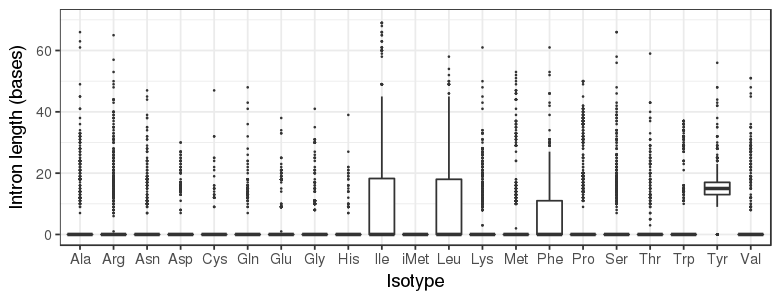

In [13]:
options(repr.plot.width=6.5, repr.plot.height=2.5)
identities %>% select(quality, isotype, intron) %>%
  filter(quality) %>%
  ggplot() + geom_boxplot(aes(x=isotype, y=intron), outlier.size=0.1) +
    xlab("Isotype") + ylab("Intron length (bases)") +
    ylim(0, 70) +
    guides(fill=guide_legend(title=NULL))

Only tyrosine has a median intron length > 0. 

## 3D pairs

In [14]:
identities %>% filter(clade == "Insecta") %>% u

ERROR: Error in function_list[[k]](value): could not find function "u"
